# LAMA: LightAutoML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Развернем библиотеку lightautoml

In [ ]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 79.4 MB/s eta 0:00:00
   ━

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn. metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier

In [ ]:
# для воспроизводимости результатов зафиксируем сид
random_state = 42
n_threads = 4 # число потоков, которые будут обрабатывать данные
np.random.seed(random_state)
torch.set_num_threads(n_threads)

## Load Dataset

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/train.xlsx')
data

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [ ]:
# Drop the "Unnamed: 0" column
data = data.drop(columns=['Unnamed: 0', 'Статус брони'])

In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Номер «Стандарт»,2,3


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Категория номера    26174 non-null  object        
 12  Гостей              26174 non-null  int64         
 13  Гостиница           26174 non-null  int64     

Видим, что в наборе данных пропусков нет

In [ ]:
data.describe()

,Номеров,Стоимость,Внесена предоплата,Ночей,Гостей,Гостиница
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,1.088714,35099.784232,19536.728165,2.151295,2.601628,2.158822
std,0.341145,38849.552238,27776.602024,1.456076,1.199428,0.979224
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,14300.000000,7800.000000,1.000000,2.000000,1.000000
50%,1.000000,23800.000000,13900.000000,2.000000,2.000000,2.000000
75%,1.000000,41100.000000,23180.000000,3.000000,3.000000,3.000000
max,6.000000,986400.000000,584500.000000,31.000000,16.000000,4.000000


In [ ]:
data.describe(include='object')

,№ брони,Способ оплаты,Источник,Категория номера
count,26174,26174,26174,26174
unique,26174,14,27,28
top,20230428-6634-194809261,Банк. карта: Банк Россия (банк. карта),Официальный сайт,Номер «Стандарт»
freq,1,13747,21077,16872


In [ ]:
# Создание нового столбца "Отмена" (0 или 1)
data['Отмена'] = data['Дата отмены'].notna().astype(int)

In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница,Отмена
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Номер «Стандарт»,2,1,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Номер «Стандарт»,2,1,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Номер «Студия»,2,4,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Номер «Стандарт»,1,3,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Номер «Люкс»,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,2,0
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Номер «Студия»,3,4,0
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Номер «Стандарт»,2,2,0
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Номер «Стандарт»,2,3,1


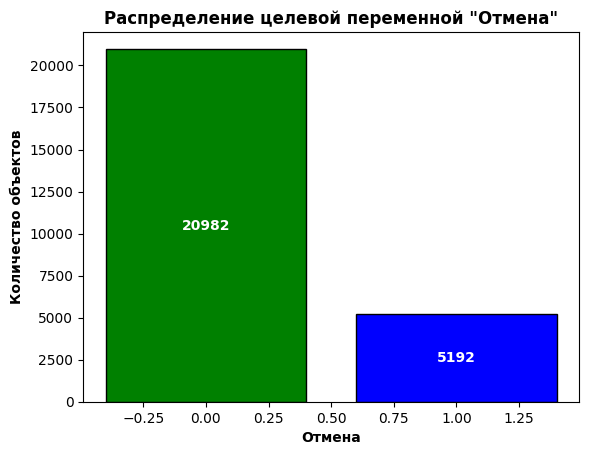

In [ ]:
import matplotlib.pyplot as plt

# Расчет количества объектов в каждом классе ("Отмена")
class_counts = data['Отмена'].value_counts()

# Создание столбчатой диаграммы
colors = ['green', 'blue']  # Цвета для классов
plt.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', width=0.8)

# Настройки осей и заголовка
plt.xlabel('Отмена', fontweight='bold')
plt.ylabel('Количество объектов', fontweight='bold')
plt.title('Распределение целевой переменной "Отмена"', fontweight='bold')
plt.ylim(0, class_counts.max() + 1000)  # Установить предел по оси Y

# Добавление количества объектов в каждом классе на столбчатую диаграмму
for i, count in enumerate(class_counts):
    plt.text(i, count / 2, str(count), ha='center', va='center', color='white', fontweight='bold')

# Отображение диаграммы
plt.show()

Видим, что классы целевой переменной несбалансированные, поэтому будем применять стратификацию при разделении данных на тренировочную и тестовую выборки

# Data Preprocessing

## Преобразование категориальных признаков в численные

In [ ]:
data = data.drop(columns=['Дата отмены'])

In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница,Отмена
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Номер «Стандарт»,2,1,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Номер «Стандарт»,2,1,0
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Номер «Студия»,2,4,0
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Номер «Стандарт»,1,3,0
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Номер «Люкс»,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,2,0
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Номер «Студия»,3,4,0
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Номер «Стандарт»,2,2,0
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Номер «Стандарт»,2,3,1


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  int64         
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  int64         
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Заезд               26174 non-null  datetime64[ns]
 7   Ночей               26174 non-null  int64         
 8   Выезд               26174 non-null  datetime64[ns]
 9   Источник            26174 non-null  int64         
 10  Категория номера    26174 non-null  int64         
 11  Гостей              26174 non-null  int64         
 12  Гостиница           26174 non-null  int64         
 13  Отмена              26174 non-null  int64     

Видим, что все признаки теперь имеют целочисленный тип

In [ ]:
data.describe()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,Отмена
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,13086.500000,1.088714,35099.784232,19536.728165,6.719684,2.151295,22.547528,24.806869,2.601628,2.158822,0.198365
std,7555.927309,0.341145,38849.552238,27776.602024,3.621091,1.456076,2.283505,1.949803,1.199428,0.979224,0.398776
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,6543.250000,1.000000,14300.000000,7800.000000,4.000000,1.000000,23.000000,25.000000,2.000000,1.000000,0.000000
50%,13086.500000,1.000000,23800.000000,13900.000000,4.000000,2.000000,23.000000,25.000000,2.000000,2.000000,0.000000
75%,19629.750000,1.000000,41100.000000,23180.000000,11.000000,3.000000,23.000000,25.000000,3.000000,3.000000,0.000000
max,26173.000000,6.000000,986400.000000,584500.000000,13.000000,31.000000,26.000000,27.000000,16.000000,4.000000,1.000000


In [ ]:
data.corr()

<ipython-input-20-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,Отмена
№ брони,1.000000,-0.003720,0.070678,0.046679,0.202926,0.013085,0.094784,-0.012843,0.023086,-0.009012,-0.002641
Номеров,-0.003720,1.000000,0.207748,0.120081,0.023379,0.012206,-0.008552,-0.140014,0.516463,0.098272,0.029320
Стоимость,0.070678,0.207748,1.000000,0.638191,-0.045488,0.664773,0.038880,-0.157671,0.380856,0.008650,0.035849
Внесена предоплата,0.046679,0.120081,0.638191,1.000000,-0.228988,0.278583,0.158421,-0.176609,0.313720,-0.072315,-0.185384
Способ оплаты,0.202926,0.023379,-0.045488,-0.228988,1.000000,-0.072312,-0.186850,0.007176,-0.011417,0.025842,0.252035
Ночей,0.013085,0.012206,0.664773,0.278583,-0.072312,1.000000,0.028277,-0.008441,0.049104,0.082375,0.063990
Источник,0.094784,-0.008552,0.038880,0.158421,-0.186850,0.028277,1.000000,-0.012900,0.060348,-0.016644,-0.047109
Категория номера,-0.012843,-0.140014,-0.157671,-0.176609,0.007176,-0.008441,-0.012900,1.000000,-0.346871,0.499957,-0.000308
Гостей,0.023086,0.516463,0.380856,0.313720,-0.011417,0.049104,0.060348,-0.346871,1.000000,-0.105007,0.023912
Гостиница,-0.009012,0.098272,0.008650,-0.072315,0.025842,0.082375,-0.016644,0.499957,-0.105007,1.000000,0.012172


<ipython-input-21-8bc3308adbea>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


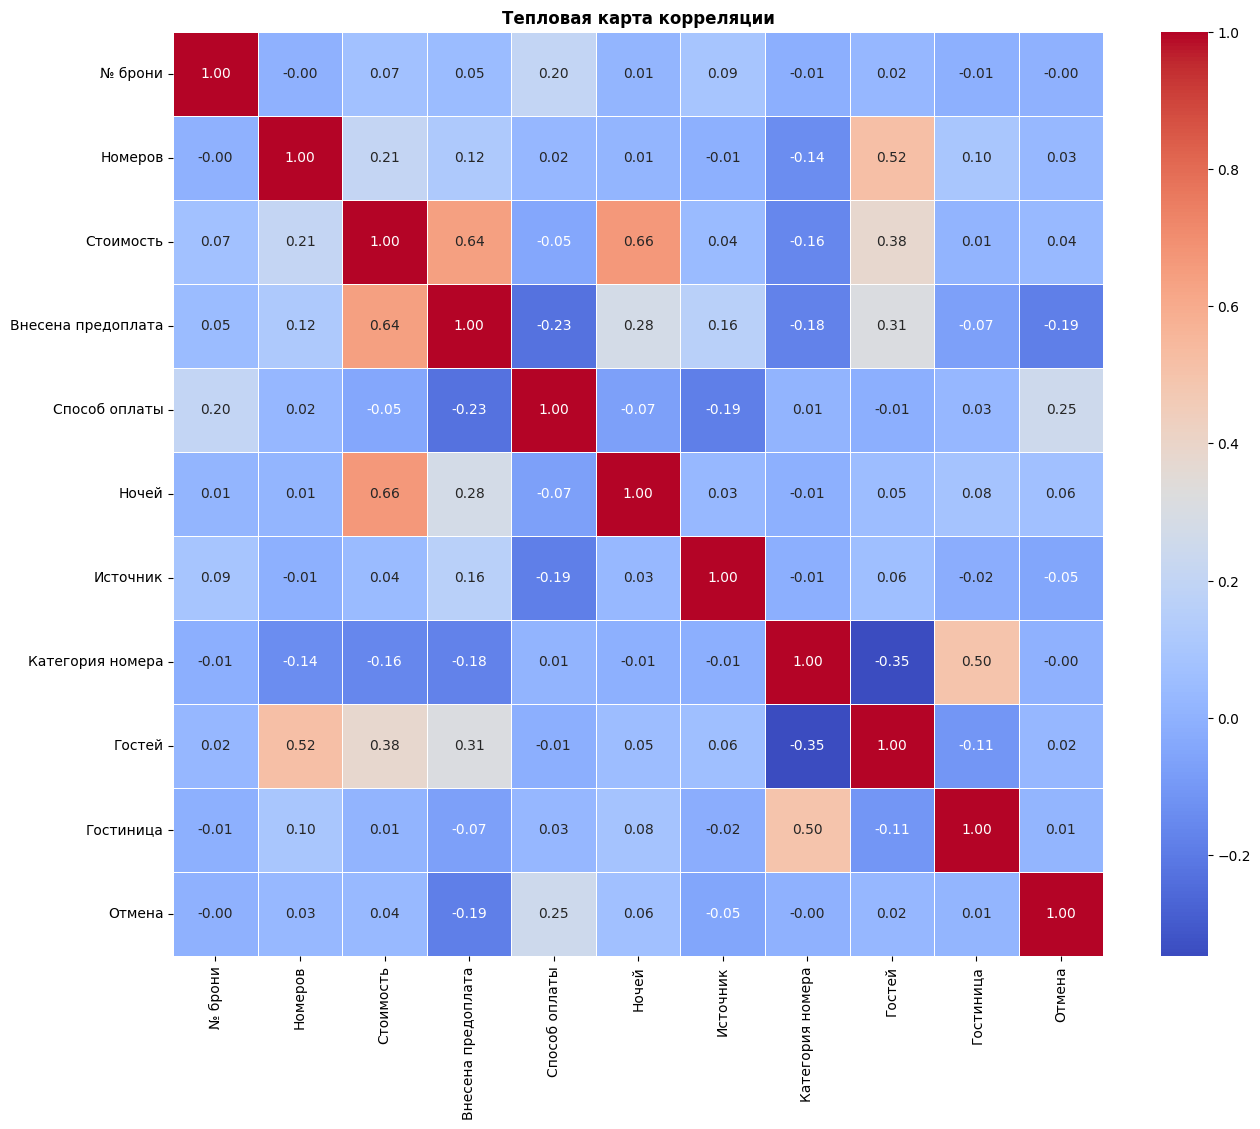

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Посчитать корреляцию
corr = data.corr()

# Создать тепловую карту
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляции', fontweight='bold')
plt.show()


In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница,Отмена
0,15613,1,25700.0,0,6,2023-04-20 20:37:30,2023-04-28 15:00:00,3,2023-05-01 12:00:00,26,25,2,1,1
1,6681,1,24800.0,12400,11,2022-06-18 14:17:02,2022-07-11 15:00:00,2,2022-07-13 12:00:00,23,25,2,1,0
2,12003,1,25800.0,12900,4,2022-11-14 22:59:30,2022-12-04 15:00:00,2,2022-12-06 12:00:00,23,27,2,4,0
3,21851,1,10500.0,0,9,2023-09-08 15:55:53,2023-09-18 15:00:00,1,2023-09-19 12:00:00,9,25,1,3,0
4,16677,1,28690.0,28690,13,2023-05-20 19:54:13,2023-05-29 15:00:00,2,2023-05-31 12:00:00,23,24,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,14661,1,18240.0,9120,4,2023-01-07 17:45:18,2023-03-10 15:00:00,2,2023-03-12 12:00:00,23,25,2,2,0
26170,17637,1,69600.0,23200,4,2023-06-20 17:54:17,2023-06-25 15:00:00,3,2023-06-28 12:00:00,23,27,3,4,0
26171,5904,1,55600.0,13900,4,2022-05-08 19:24:05,2022-06-24 15:00:00,4,2022-06-28 12:00:00,23,25,2,2,0
26172,3414,1,6300.0,0,10,2022-02-19 09:55:50,2022-04-27 15:00:00,1,2022-04-28 12:00:00,17,25,2,3,1


## Model Train and Predict

# Библиотека функций

### Функция для подсчета метрик качества модели бинарной классификации

# Создание и обучение пресета TabularAutoML

In [ ]:
train_data, test_data = train_test_split(
    data,
    test_size = 0.33,
    random_state = random_state,
    stratify=data['Отмена'])

train_data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница,Отмена
17441,11847,1,23300.0,23300,9,2022-11-16 17:21:06,2022-11-25 15:00:00,2,2022-11-27 12:00:00,26,25,2,2,0
9842,12575,1,90550.0,90550,4,2022-11-21 23:08:46,2022-12-30 15:00:00,3,2023-01-02 12:00:00,23,25,4,3,0
4260,7273,1,13900.0,13900,4,2022-07-18 21:10:05,2022-07-22 15:00:00,1,2022-07-23 12:00:00,23,25,2,2,0
8600,4955,2,95200.0,47600,4,2022-04-27 13:31:43,2022-06-04 15:00:00,2,2022-06-06 12:00:00,23,27,4,4,0
18523,14025,1,28030.0,0,11,2023-02-08 15:57:19,2023-02-20 15:00:00,2,2023-02-22 12:00:00,21,27,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20846,15636,1,40600.0,19600,11,2023-04-01 11:02:56,2023-04-29 15:00:00,2,2023-05-01 12:00:00,23,27,2,4,1
10351,21677,1,17400.0,17400,13,2023-09-07 20:39:41,2023-09-15 15:00:00,1,2023-09-16 12:00:00,23,24,3,1,0
17181,13374,1,10800.0,0,12,2023-01-27 14:17:10,2023-01-28 15:00:00,1,2023-01-29 12:00:00,23,25,2,2,1
23769,762,1,18620.0,18620,3,2022-01-18 20:08:46,2022-02-11 15:00:00,2,2022-02-13 12:00:00,23,25,2,3,0


In [ ]:
test_data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница,Отмена
5589,5129,1,9800.0,9800,4,2022-06-09 07:08:30,2022-06-09 15:00:00,1,2022-06-10 12:00:00,23,25,2,1,0
4785,6089,1,92800.0,23200,4,2022-04-25 22:26:18,2022-06-28 15:00:00,4,2022-07-02 12:00:00,23,27,3,2,0
7890,13447,1,9500.0,0,9,2023-02-01 16:23:25,2023-02-01 15:00:00,1,2023-02-02 12:00:00,20,25,2,2,0
17600,11589,1,22610.0,11305,4,2022-10-22 13:14:01,2022-11-11 15:00:00,2,2022-11-13 12:00:00,23,25,3,3,0
6111,9526,1,13900.0,13900,4,2022-08-27 15:55:33,2022-09-10 15:00:00,1,2022-09-11 12:00:00,23,25,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,2034,1,30000.0,15000,4,2022-03-07 11:39:05,2022-03-15 15:00:00,2,2022-03-17 12:00:00,23,27,2,4,0
10721,6856,1,55600.0,13900,4,2022-06-24 15:04:01,2022-07-14 15:00:00,4,2022-07-18 12:00:00,23,25,2,2,0
5736,24171,1,18900.0,18900,9,2023-11-16 12:39:48,2023-11-17 15:00:00,2,2023-11-19 12:00:00,26,25,2,2,0
3919,12992,1,26315.0,0,11,2023-01-06 14:17:05,2023-01-12 15:00:00,3,2023-01-15 12:00:00,21,25,2,3,1


In [ ]:
task = Task(
    'binary',
    metric='accuracy'
)

In [ ]:
roles = {
    'target': 'Отмена',
}

In [ ]:
n_folds = 5
timeout = 60 * 30

In [ ]:
automl = TabularAutoML(
    task = task,
    timeout = timeout,
    cpu_limit = n_threads,
    reader_params = {'n_jobs': n_threads, 'cv': n_folds, 'random_state': random_state}
)

In [ ]:
%%time
model_pred = automl.fit_predict(data, roles = roles, verbose = 1)

[11:35:29] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[11:35:29] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


[11:35:29] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[11:35:29] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:35:29] - time: 1800.00 seconds


INFO:lightautoml.automl.presets.base:- time: 1800.00 seconds


[11:35:29] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:35:29] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:35:29] Train data shape: (26174, 14)



INFO:lightautoml.reader.base:Train data shape: (26174, 14)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:35:36] Layer 1 train process start. Time left 1792.60 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 1792.60 secs


[11:35:37] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'embed_sizes': array([14, 19,  4, 13,  8,  3, 13,  8,  4, 13,  8], dtype=int32), 'data_size': 20}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.8015281757402101
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.8015281757402101
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.8034383954154728
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = 0.8613180515759312
INFO3:lightautoml.

[11:36:05] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8742645373271185


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8742645373271185


[11:36:05] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:36:05] Time left 1763.70 secs



INFO:lightautoml.automl.base:Time left 1763.70 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.0995224
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.10086
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's binary_error: 0.10086
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[109]	valid's binary_error: 0.0993314


[11:36:07] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[11:36:07] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.03, 'num_leaves': 32, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 1200, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.10086
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.101624
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's binary_error: 0.102388
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[134]	vali

[11:36:20] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8985634599220601


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8985634599220601


[11:36:20] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:36:20] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-8ca08c43-e5c6-4b3b-98a7-de7a5990588b
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.102006
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's binary_error: 0.104107
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[51]	valid's binary_error: 0.100478
INFO:optuna.study.study:Trial 0 finished with value: 0.8995224450811843 and parameters: {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}. Best is trial 0 with value: 0.8995224450811843.
INFO3:lightautoml.ml_alg

[11:41:22] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.9106788766569048, 'num_leaves': 203, 'bagging_fraction': 0.9257753489233927, 'min_sum_hessian_in_leaf': 0.010657995031590244, 'reg_alpha': 0.016518287964777393, 'reg_lambda': 0.00013207183398300642}
 achieve 0.9007 accuracy


[11:41:22] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 203, 'feature_fraction': 0.9106788766569048, 'bagging_fraction': 0.9257753489233927, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 0.016518287964777393, 'reg_lambda': 0.00013207183398300642, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'min_sum_hessian_in_leaf': 0.010657995031590244}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's binary_error: 0.101433
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[19]	valid's binary_error: 0.

[11:41:30] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.8981049896844197


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.8981049896844197


[11:41:30] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[11:41:30] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 5000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8913988	test: 0.8918816	best: 0.8918816 (0)	total: 57.2ms	remaining: 4m 45s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8934047	test: 0.8913085	best: 0.8918816 (0)	total: 681ms	remaining: 33s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by 

[11:41:43] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.8939405516925193


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.8939405516925193


[11:41:43] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[11:41:43] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-def672fe-528f-4736-ab1b-2ce134154853
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8913988	test: 0.8918816	best: 0.8918816 (0)	total: 5.82ms	remaining: 29.1s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8915421	test: 0.8909265	best: 0.8924546 (2)	total: 595ms	remaining: 28.9s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.8924546323
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 2
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 3 iterations.
INFO:optuna.study.study:Trial 0 finished with value: 0.8924546322827125 and parameters: {'max_depth': 4, 'l2_leaf_reg': 3.6010467344475403, 'min_data_in_leaf': 15}. Best is trial 0 with value: 0.8924546322827125.
INFO3:li

[11:45:44] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 6, 'l2_leaf_reg': 1.8542164261573178e-05, 'min_data_in_leaf': 1}
 achieve 0.8978 accuracy


[11:45:44] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 1.8542164261573178e-05, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 6, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	learn: 0.8913988	test: 0.8918816	best: 0.8918816 (0)	total: 7.05ms	remaining: 21.2s
DEBUG:lightautoml.ml_algo.boost_cb:100:	learn: 0.8940733	test: 0.8926457	best: 0.8926457 (98)	total: 741ms	remaining: 21.3s
DEBUG:lightaut

[11:45:58] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.8958508443493544


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.8958508443493544


[11:45:58] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[11:45:58] Time left 1170.57 secs



INFO:lightautoml.automl.base:Time left 1170.57 secs



[11:45:58] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[11:45:58] Blending: optimization starts with equal weights and score 0.897302666768549


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.897302666768549


[11:45:59] Blending: iteration 0: score = 0.8985252540689234, weights = [0.         0.6309135  0.05735795 0.2543706  0.05735795]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.8985252540689234, weights = [0.         0.6309135  0.05735795 0.2543706  0.05735795]


[11:45:59] Blending: iteration 1: score = 0.8985634599220601, weights = [0.         0.7783652  0.         0.22163478 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.8985634599220601, weights = [0.         0.7783652  0.         0.22163478 0.        ]


[11:45:59] Blending: iteration 2: score = 0.8985252540689234, weights = [0.         0.6523192  0.         0.34768078 0.        ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = 0.8985252540689234, weights = [0.         0.6523192  0.         0.34768078 0.        ]


[11:45:59] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[11:45:59] Automl preset training completed in 630.05 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 630.05 seconds



[11:45:59] Model description:
Final prediction for new objects (level 0) = 
	 0.77837 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.22163 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.77837 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.22163 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



CPU times: user 15min 38s, sys: 36.6 s, total: 16min 14s
Wall time: 10min 30s


## Вывод полученной модели

In [ ]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.77837 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.22163 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 


## Вывод наиболее важных признаков для полученной модели бинарной классификации.

<Axes: xlabel='Feature'>

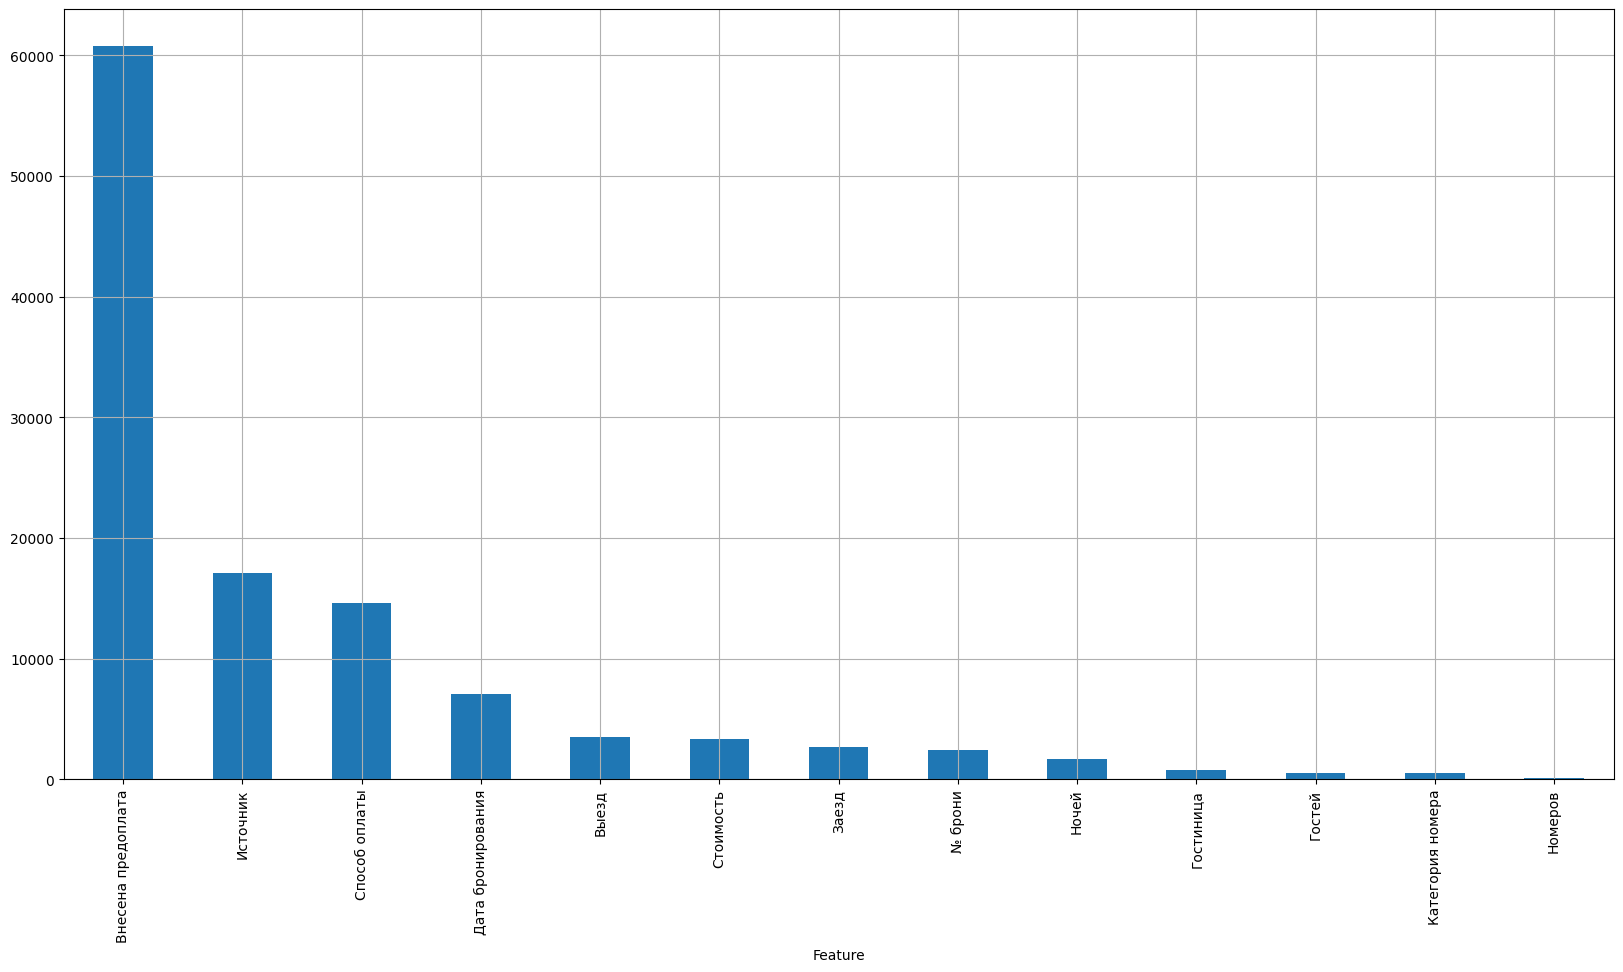

In [ ]:
fi = automl.get_feature_scores('fast')
fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

## Вывод предсказанных значений

In [ ]:
%%time
preds = automl.predict(test_data)
print (f'Предсказанные значения {preds}')
preds = preds.data[:, 0]

Предсказанные значения array([[0.11607946],
       [0.1832051 ],
       [0.13412097],
       ...,
       [0.12492793],
       [0.8949766 ],
       [0.2598338 ]], dtype=float32)
CPU times: user 1.43 s, sys: 15.9 ms, total: 1.45 s
Wall time: 996 ms


## Вывод метрик качества построенной модели

In [ ]:
y_test = test_data['Отмена'].values
res_1 = (preds >= 0.5).astype(int)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def calculate_classification_metrics(y_true, y_pred, y_prob, model_name):
    """
    Функция для подсчета метрик качества модели бинарной классификации, включая ROC AUC.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_prob -- вероятности положительного класса
    model_name -- название модели

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_prob),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist()
    }

    return metrics


In [ ]:
# Теперь вызываем функцию, передавая три аргумента: y_test, res_1 и y_prob
metrics_1 = calculate_classification_metrics(y_test, res_1, preds, 'Model TabularAutoML')

# Выводим метрики
print("\nМетрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")


Метрики качества модели:
Model: Model TabularAutoML
Accuracy: 0.9032183375781431
Precision: 0.9802847754654983
Recall: 0.5224751897256276
F1 Score: 0.6816450875856817
ROC AUC: 0.9052248994206545
Confusion Matrix: [[6907, 18], [818, 895]]


In [ ]:
print(classification_report(y_test, res_1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6925
           1       0.98      0.52      0.68      1713

    accuracy                           0.90      8638
   macro avg       0.94      0.76      0.81      8638
weighted avg       0.91      0.90      0.89      8638



<Axes: >

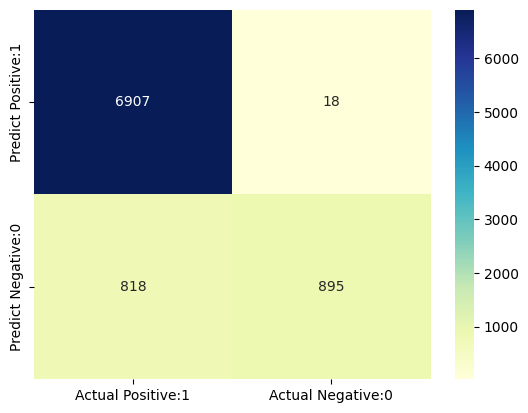

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_1)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

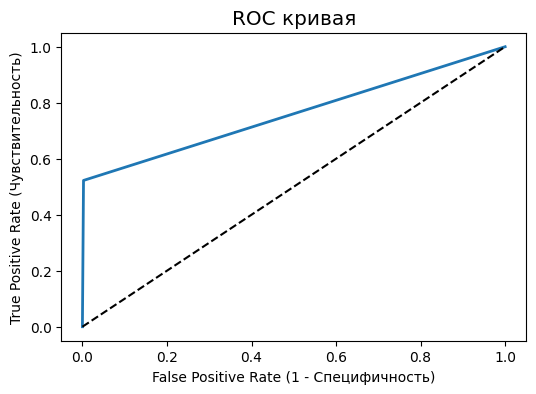

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res_1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

# XGBoostClassifier с подбором гиперпараметров

### Обучим модель XGBoostClassifier на этом же наборе данных. Далее, сравним по метрикам качества модели LAMA и XGBoostClassifier.

In [ ]:
X = data.drop('Отмена', axis=1)
y = data['Отмена']

In [ ]:
X

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,15613,1,25700.0,0,6,2023-04-20 20:37:30,2023-04-28 15:00:00,3,2023-05-01 12:00:00,26,25,2,1
1,6681,1,24800.0,12400,11,2022-06-18 14:17:02,2022-07-11 15:00:00,2,2022-07-13 12:00:00,23,25,2,1
2,12003,1,25800.0,12900,4,2022-11-14 22:59:30,2022-12-04 15:00:00,2,2022-12-06 12:00:00,23,27,2,4
3,21851,1,10500.0,0,9,2023-09-08 15:55:53,2023-09-18 15:00:00,1,2023-09-19 12:00:00,9,25,1,3
4,16677,1,28690.0,28690,13,2023-05-20 19:54:13,2023-05-29 15:00:00,2,2023-05-31 12:00:00,23,24,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,14661,1,18240.0,9120,4,2023-01-07 17:45:18,2023-03-10 15:00:00,2,2023-03-12 12:00:00,23,25,2,2
26170,17637,1,69600.0,23200,4,2023-06-20 17:54:17,2023-06-25 15:00:00,3,2023-06-28 12:00:00,23,27,3,4
26171,5904,1,55600.0,13900,4,2022-05-08 19:24:05,2022-06-24 15:00:00,4,2022-06-28 12:00:00,23,25,2,2
26172,3414,1,6300.0,0,10,2022-02-19 09:55:50,2022-04-27 15:00:00,1,2022-04-28 12:00:00,17,25,2,3


### Разделение данных на тренировочную и тестовую часть с использованием стратификации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
# Удаляем столбцы с типом данных datetime
X_train = X_train.select_dtypes(exclude=['datetime'])
X_test = X_test.select_dtypes(exclude=['datetime'])

In [ ]:
X_train

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница
17441,11847,1,23300.0,23300,9,2,26,25,2,2
9842,12575,1,90550.0,90550,4,3,23,25,4,3
4260,7273,1,13900.0,13900,4,1,23,25,2,2
8600,4955,2,95200.0,47600,4,2,23,27,4,4
18523,14025,1,28030.0,0,11,2,21,27,2,2
...,...,...,...,...,...,...,...,...,...,...
20846,15636,1,40600.0,19600,11,2,23,27,2,4
10351,21677,1,17400.0,17400,13,1,23,24,3,1
17181,13374,1,10800.0,0,12,1,23,25,2,2
23769,762,1,18620.0,18620,3,2,23,25,2,3


In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Подбор гиперпараметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV

# Задаем гиперпараметры для поиска
params = {
    'max_depth': [6, 9],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [500, 1000],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 2]
}

# Инициализируем модель
model = XGBClassifier()

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:")
print(grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие гиперпараметры:
{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500}


In [ ]:
# Обучение модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Предсказание классов
res_2 = best_model.predict(X_test_scaled)
res_2_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Рассчет метрик, включая ROC AUC
metrics_2 = calculate_classification_metrics(y_test, res_2, res_2_proba, 'Model XGBoostClassifier')

# Вывод метрик
print("Метрики качества модели:")
for metric, value in metrics_2.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model XGBoostClassifier
Accuracy: 0.8974299606390368
Precision: 0.9284974093264249
Recall: 0.5230589608873322
F1 Score: 0.6691560866318148
ROC AUC: 0.8210563096811176
Confusion Matrix: [[6856, 69], [817, 896]]


In [ ]:
print(classification_report(y_test, res_2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6925
           1       0.93      0.52      0.67      1713

    accuracy                           0.90      8638
   macro avg       0.91      0.76      0.80      8638
weighted avg       0.90      0.90      0.89      8638



<Axes: >

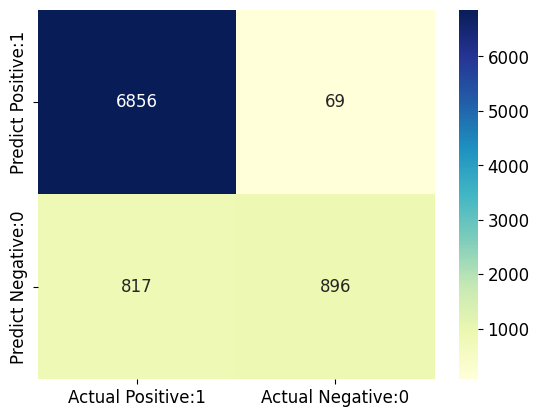

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_2)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

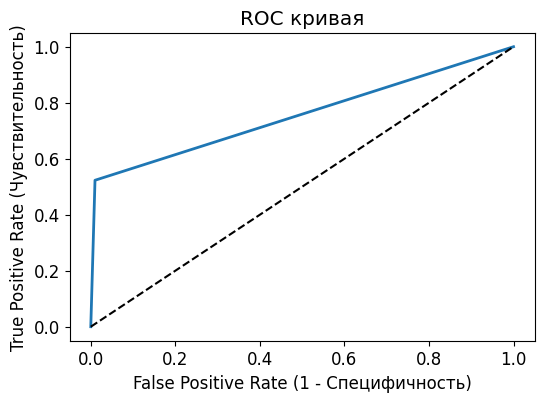

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res_2, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

In [ ]:
from catboost import CatBoostClassifier

# Задаем гиперпараметры для поиска
params = {
    'depth': [6],
    'learning_rate': [0.3],
    'iterations': [500]
}

# Инициализируем модель
model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', verbose=False)

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:")
print(grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........depth=6, iterations=500, learning_rate=0.3; total time=   3.0s
[CV] END .........depth=6, iterations=500, learning_rate=0.3; total time=   4.3s
[CV] END .........depth=6, iterations=500, learning_rate=0.3; total time=   5.0s
[CV] END .........depth=6, iterations=500, learning_rate=0.3; total time=   3.2s
[CV] END .........depth=6, iterations=500, learning_rate=0.3; total time=   3.1s
Лучшие гиперпараметры:
{'depth': 6, 'iterations': 500, 'learning_rate': 0.3}


In [ ]:
# Обучение модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Предсказание классов
res_3 = best_model.predict(X_test_scaled)
res_3_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Рассчет метрик, включая ROC AUC
metrics_3 = calculate_classification_metrics(y_test, res_3, res_3_proba, 'Model CatBoostClassifier')

# Вывод метрик
print("Метрики качества модели:")
for metric, value in metrics_3.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model CatBoostClassifier
Accuracy: 0.8888631627691596
Precision: 0.8419618528610354
Recall: 0.5411558669001751
F1 Score: 0.6588486140724947
ROC AUC: 0.805928796778089
Confusion Matrix: [[6751, 174], [786, 927]]


In [ ]:
print(classification_report(y_test, res_3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6925
           1       0.84      0.54      0.66      1713

    accuracy                           0.89      8638
   macro avg       0.87      0.76      0.80      8638
weighted avg       0.89      0.89      0.88      8638



<Axes: >

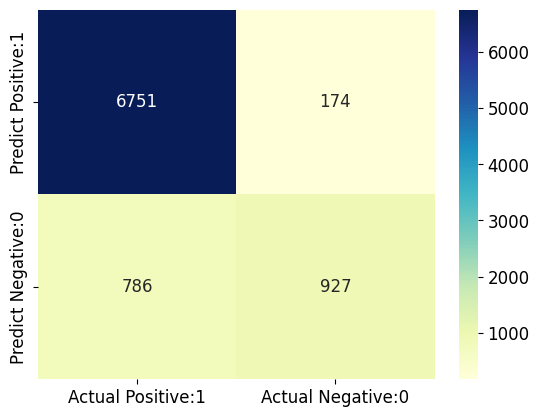

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_3)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

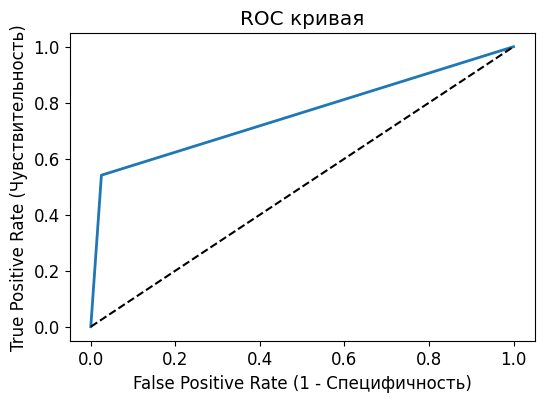

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, res_3, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC кривая')

plt.xlabel('False Positive Rate (1 - Специфичность)')

plt.ylabel('True Positive Rate (Чувствительность)')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_features': ['sqrt'],
    'max_depth' : [6],
    'criterion' :['gini']
}

# Initialize the classifier
clf = RandomForestClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   3.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   1.3s
Best Parameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
# Обучение модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Предсказание классов
res_4 = best_model.predict(X_test_scaled)
res_4_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Рассчет метрик, включая ROC AUC
metrics_4 = calculate_classification_metrics(y_test, res_4, res_4_proba, 'Model RandomForestClassifier')

# Вывод метрик
print("Метрики качества модели:")
for metric, value in metrics_4.items():
    print(f"{metric}: {value}")

Метрики качества модели:
Model: Model RandomForestClassifier
Accuracy: 0.8990507061819866
Precision: 0.9740698985343855
Recall: 0.5043782837127846
F1 Score: 0.6646153846153847
ROC AUC: 0.8122361807456675
Confusion Matrix: [[6902, 23], [849, 864]]


<Axes: >

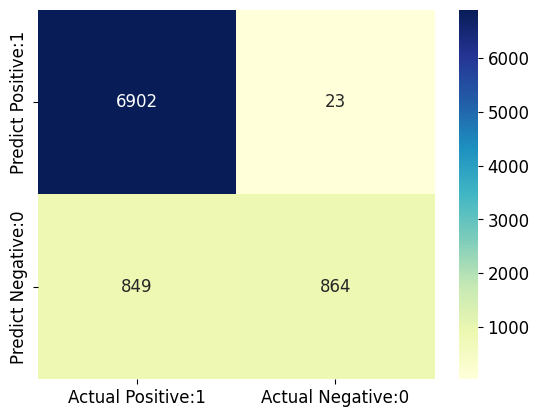

In [ ]:
# Вычисление матрицы путаницы
lr_confusion_matrix = confusion_matrix(y_test, res_4)

# Визуализация матрицы путаницы
cm_matrix = pd.DataFrame(data=lr_confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Преобразуем данные в тензоры для PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# DataLoader для обработки данных
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Определение улучшенной нейронной сети
class ImprovedBinaryClassificationNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedBinaryClassificationNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 1)  # Выход 1
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.dropout(x)
        x = self.sigmoid(self.fc6(x))
        return x

# Инициализация модели
input_dim = X_train.shape[1]
model = ImprovedBinaryClassificationNN(input_dim)

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Функция обучения модели с ранней остановкой
def train_model(model, criterion, optimizer, train_loader, epochs=200):
    model.train()
    best_roc_auc = 0
    for epoch in range(epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Проверка ROC AUC на тестовой выборке
        with torch.no_grad():
            model.eval()
            y_pred_val = model(X_test_tensor).numpy()  # Предсказания на тесте
            roc_auc = roc_auc_score(y_test, y_pred_val)  # y_test - истинные метки тестовой выборки

        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            torch.save(model.state_dict(), 'best_model.pth')  # Сохранение лучшей модели

        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}, ROC AUC: {roc_auc:.4f}")

    # Загрузка лучшей модели после обучения
    model.load_state_dict(torch.load('best_model.pth'))

# Обучение модели
train_model(model, criterion, optimizer, train_loader)

ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
from sklearn.metrics import roc_auc_score
# Предсказание вероятностей для тестового набора
predictions = model.predict(X_test_scaled)

# Преобразование вероятностей в бинарные классы ('p' для ядовитого и 'e' для съедобного)
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]

# Преобразование вероятностей в бинарные классы (1 для ядовитого, 0 для съедобного)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

# Рассчитываем метрику ROC AUC
roc_auc = roc_auc_score(y_test, prediction_classes)
print(f"ROC AUC Score: {roc_auc:.4f}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ROC AUC Score: 0.7345


# Model Evaluation

In [ ]:
model_metrics_1_filtered = {key: value for key, value in metrics_1.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_2_filtered = {key: value for key, value in metrics_2.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_3_filtered = {key: value for key, value in metrics_3.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

model_metrics_4_filtered = {key: value for key, value in metrics_4.items() if ((key != 'Model') and (key != 'Confusion Matrix'))}

# Создание DataFrame
df = pd.DataFrame({
    "Model TabularAutoML": model_metrics_1_filtered,
    "Model XGBoostClassifier": model_metrics_2_filtered,
    "Model CatBoostClassifier": model_metrics_3_filtered,
    "Model RandomForestClassifier": model_metrics_4_filtered
})

# Функция для форматирования значений
def format_values(value):
    if isinstance(value, float):
        return "{:.8f}".format(value)
    else:
        return value

# Применение функции к каждому элементу DataFrame
df = df.applymap(format_values)

# Вывод DataFrame как красивой таблицы
display(df)

,Model TabularAutoML,Model XGBoostClassifier,Model CatBoostClassifier,Model RandomForestClassifier
Accuracy,0.90437601,0.89742996,0.88886316,0.89905071
Precision,0.98179750,0.92849741,0.84196185,0.97406990
Recall,0.51583981,0.52305896,0.54115587,0.50437828
F1 Score,0.67633229,0.66915609,0.65884861,0.66461538
ROC AUC,0.90682513,0.82105631,0.80592880,0.81223618


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/test.xlsx')
data

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,Номер «Студия»,3,4
1,1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,Номер «Стандарт»,2,3
2,2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
3,3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1
4,4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,Номер «Стандарт»,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2022-03-27 21:30:38,2022-05-07 15:00:00,2,2022-05-09 12:00:00,Официальный сайт,Номер «Студия»,4,2
11214,11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,2023-11-11 17:51:55,2024-02-16 15:00:00,5,2024-02-21 12:00:00,Официальный сайт,Коттедж с 2 спальнями,4,1
11215,11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),2022-02-09 02:23:14,2022-02-09 15:00:00,1,2022-02-10 12:00:00,Официальный сайт,Коттедж с 3 спальнями,5,1
11216,11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),2023-01-21 09:10:17,2023-01-28 15:00:00,1,2023-01-29 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,Номер «Студия»,3,4
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,Номер «Стандарт»,2,3
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,Номер «Стандарт»,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2022-03-27 21:30:38,2022-05-07 15:00:00,2,2022-05-09 12:00:00,Официальный сайт,Номер «Студия»,4,2
11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,2023-11-11 17:51:55,2024-02-16 15:00:00,5,2024-02-21 12:00:00,Официальный сайт,Коттедж с 2 спальнями,4,1
11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),2022-02-09 02:23:14,2022-02-09 15:00:00,1,2022-02-10 12:00:00,Официальный сайт,Коттедж с 3 спальнями,5,1
11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),2023-01-21 09:10:17,2023-01-28 15:00:00,1,2023-01-29 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             11218 non-null  int64         
 1   Номеров             11218 non-null  int64         
 2   Стоимость           11218 non-null  float64       
 3   Внесена предоплата  11218 non-null  int64         
 4   Способ оплаты       11218 non-null  int64         
 5   Дата бронирования   11218 non-null  datetime64[ns]
 6   Заезд               11218 non-null  datetime64[ns]
 7   Ночей               11218 non-null  int64         
 8   Выезд               11218 non-null  datetime64[ns]
 9   Источник            11218 non-null  int64         
 10  Категория номера    11218 non-null  int64         
 11  Гостей              11218 non-null  int64         
 12  Гостиница           11218 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(9)
mem

In [ ]:
# Удаление столбцов с типом данных datetime из данных
data = data.select_dtypes(exclude=['datetime'])

In [ ]:
data

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница
0,10450,1,23750.0,23750,4,2,20,25,3,4
1,5236,1,15010.0,7505,4,2,20,23,2,3
2,5166,1,8400.0,8400,11,1,20,23,2,1
3,8745,1,42500.0,42500,4,3,20,19,4,1
4,6411,1,62500.0,11900,13,5,20,23,1,1
...,...,...,...,...,...,...,...,...,...,...
11213,1718,1,50200.0,50200,3,2,20,25,4,2
11214,11145,1,190100.0,43500,13,5,20,20,4,1
11215,302,1,42300.0,42300,4,1,20,21,5,1
11216,5701,1,27900.0,27900,4,1,20,19,4,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   № брони             11218 non-null  int64  
 1   Номеров             11218 non-null  int64  
 2   Стоимость           11218 non-null  float64
 3   Внесена предоплата  11218 non-null  int64  
 4   Способ оплаты       11218 non-null  int64  
 5   Ночей               11218 non-null  int64  
 6   Источник            11218 non-null  int64  
 7   Категория номера    11218 non-null  int64  
 8   Гостей              11218 non-null  int64  
 9   Гостиница           11218 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 876.5 KB


In [ ]:
'''scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)'''

In [ ]:
'''res_final = model.predict(data_scaled)'''

In [ ]:
res_final

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Create a DataFrame with the array as a single column
df = pd.DataFrame(res_final)

# Save the DataFrame to a CSV file
df.to_csv('example.csv', index=False)